# One dimensional Neural Network

In [63]:
from neuralnetwork.datasets import nregion
from neuralnetwork import Network, build_scoop_network_1D

# Load Dataset

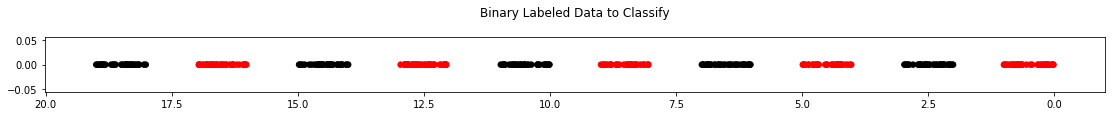

In [64]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_data(regions=10)
nregion.graph(X_train,Y_train, padding =20)

Layer: L0, Neurons: 1, Activation: None, Weights: (0, 0), Biases: (0, 0)
Layer: L1, Neurons: 5, Activation: absolute, Weights: (5, 1), Biases: (5, 1)
Layer: L2, Neurons: 5, Activation: relu, Weights: (5, 5), Biases: (5, 1)
Layer: L3, Neurons: 1, Activation: sigmoid, Weights: (1, 5), Biases: (1, 1)


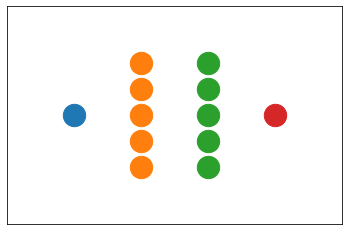

In [65]:
# Example Network
mynetwork = Network(1)
mynetwork.add_layer(5, activation = 'absolute' )
mynetwork.add_layer(5, activation = 'relu')
mynetwork.add_layer(1, activation = 'sigmoid')
mynetwork.summary()

In [66]:
# Change the slopes of first layer to 1
mynetwork.layers['L1']['weights'] = np.ones_like(mynetwork.layers['L1']['weights'])
mynetwork.layers['L1']['weights']
mynetwork.layers['L2']['weights'] = -np.identity(mynetwork.layers['L2']['weights'].shape[0], dtype=None)
mynetwork.layers['L2']['weights']
mynetwork.layers['L3']['weights'] = np.ones_like(mynetwork.layers['L3']['weights'])
mynetwork.layers['L3']['weights']

array([[1., 1., 1., 1., 1.]])

# Graph the decision boundary

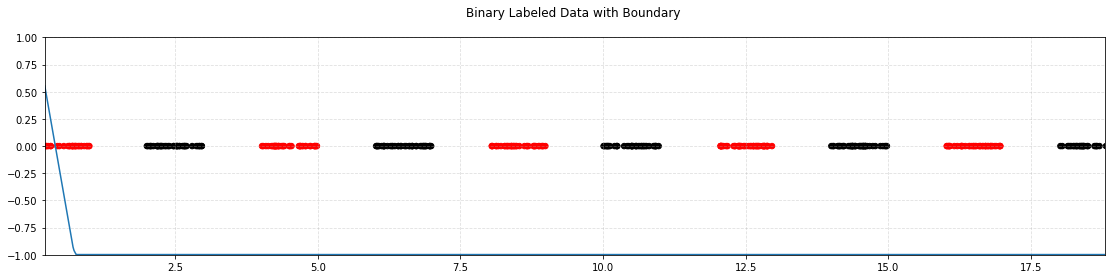

In [67]:
# Graph Decision Boundary
nregion.graph(X_train,Y_train, decision = mynetwork.decision)

# Train Biases Only

In [68]:
mynetwork.train_biases_only()

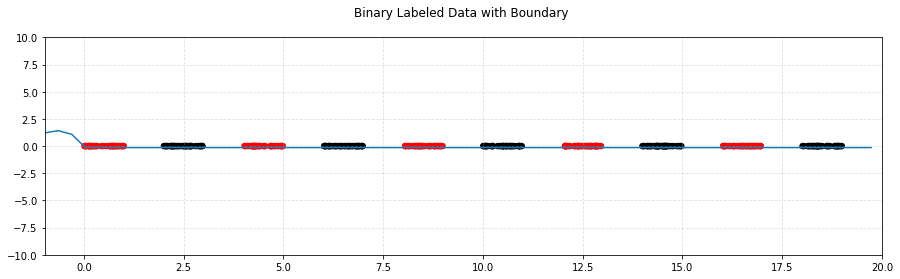

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


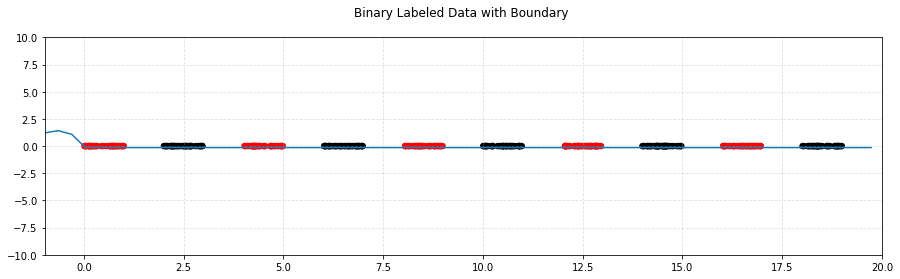

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


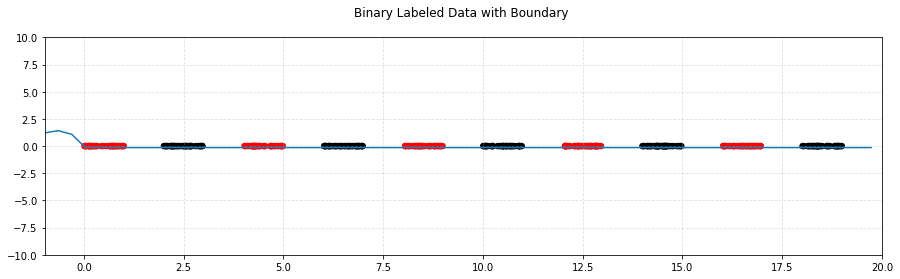

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


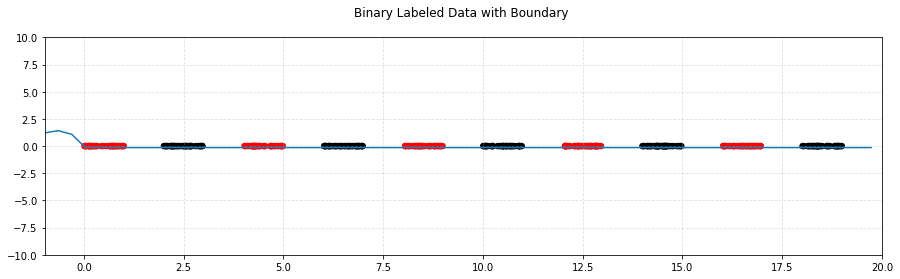

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


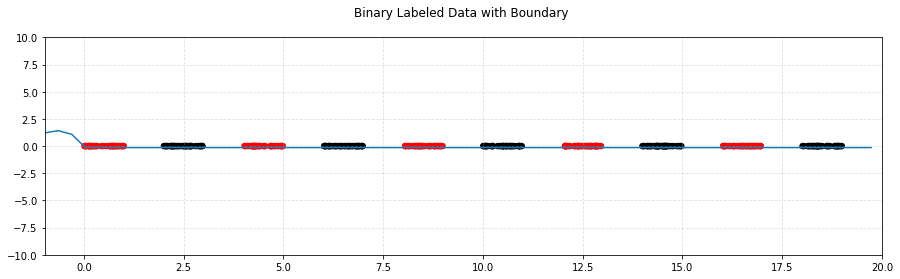

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


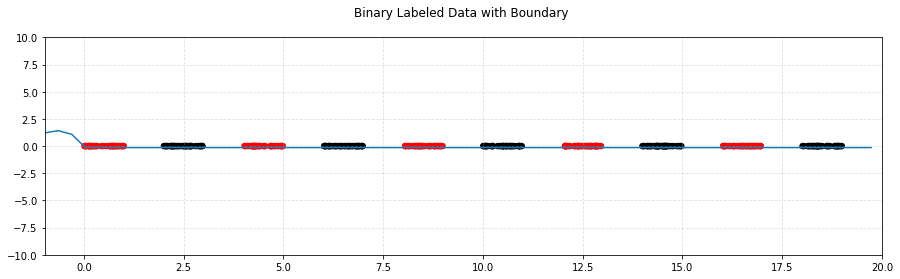

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


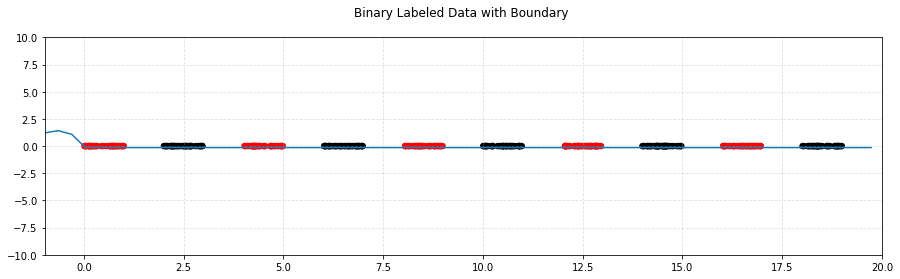

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


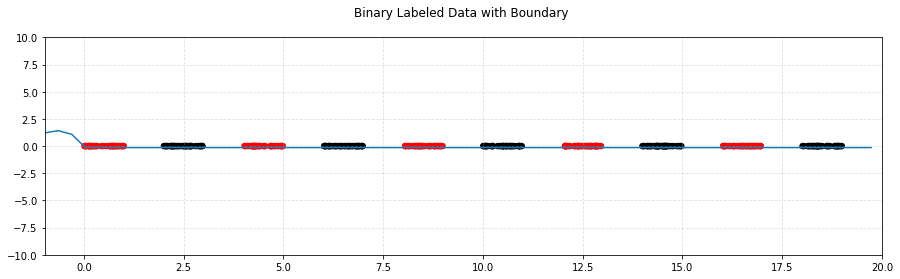

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


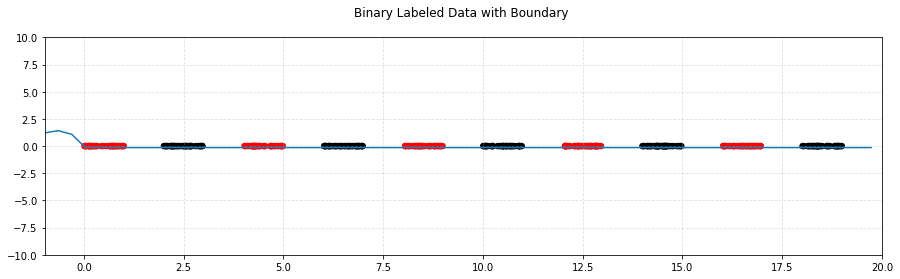

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


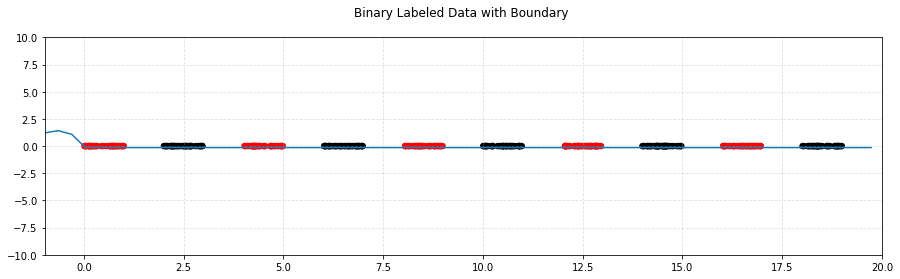

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


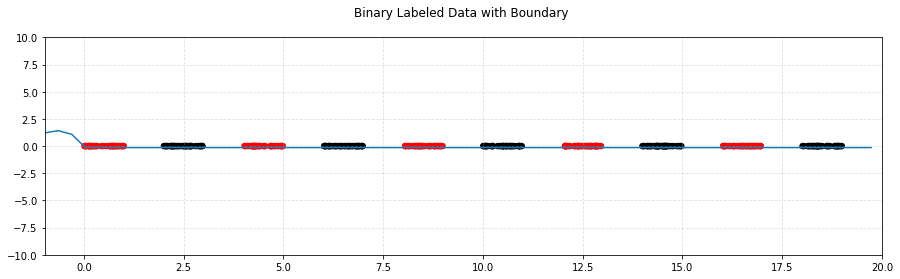

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


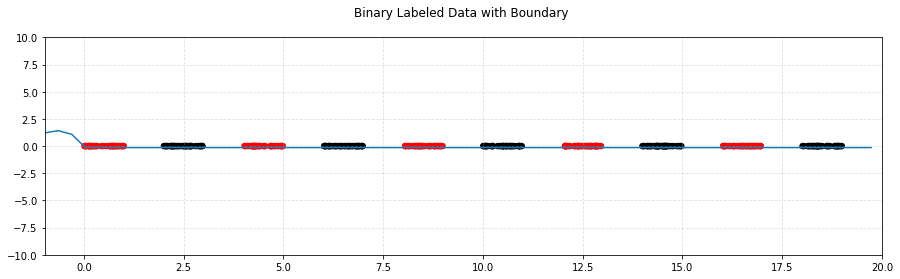

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


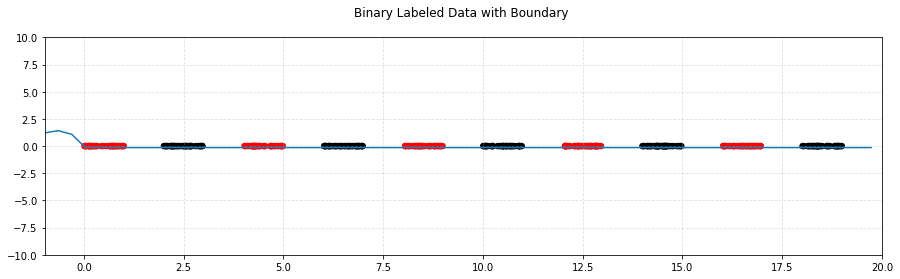

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


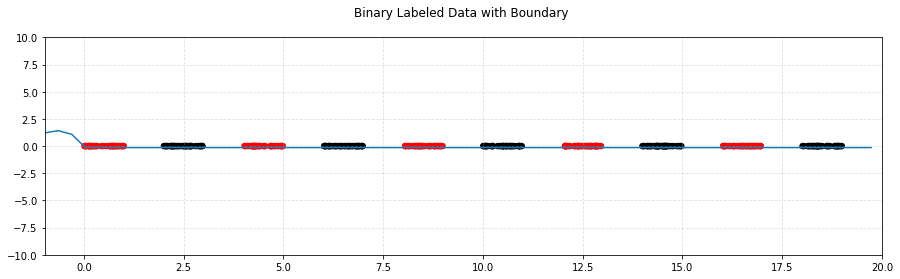

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


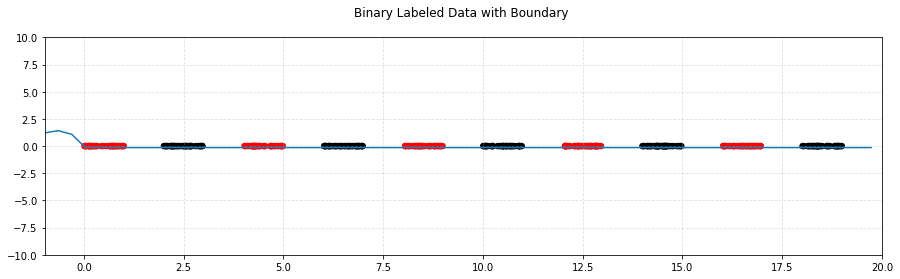

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


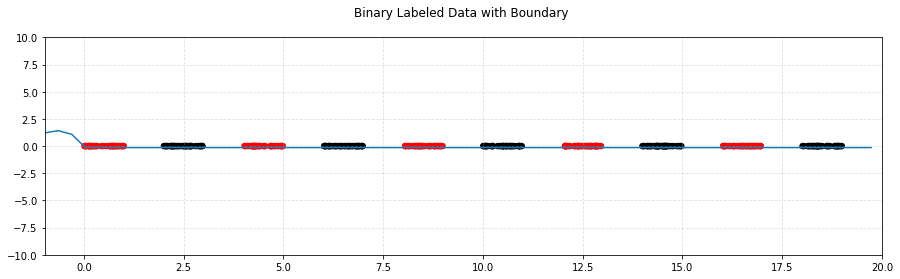

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


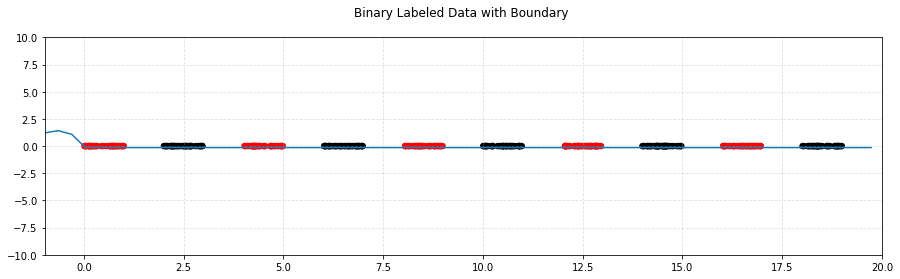

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


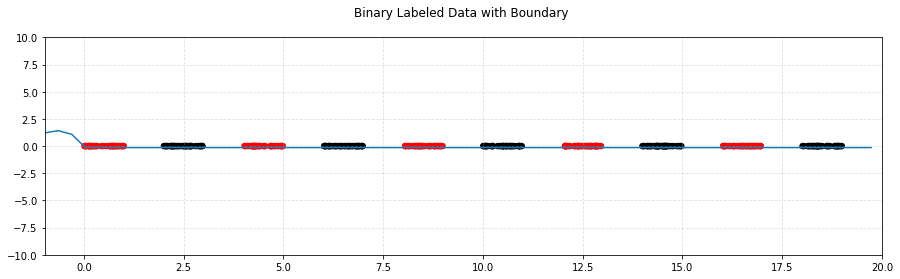

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


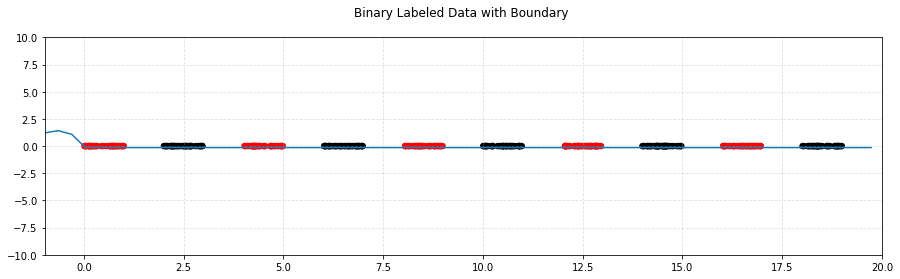

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


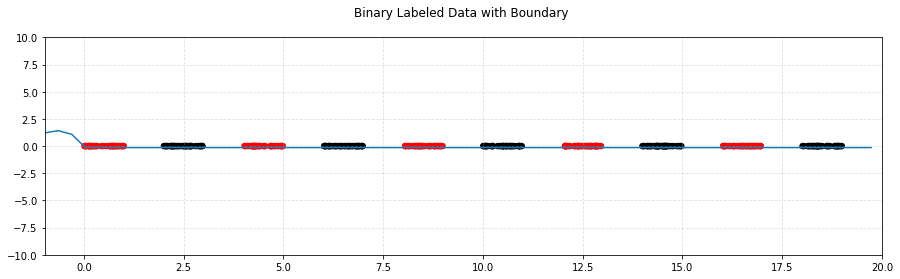

loss: 0.695 acc:  50% val_loss: 0.698 val_acc:  48%


KeyboardInterrupt: 

In [69]:
import matplotlib.pyplot as plt
import numpy as np
decision = mynetwork.decision
learning_rate = 1
for n in range(100):
    #mynetwork.train_mini_batch(X_train, Y_train, learning_rate=0.01, num_epochs=100, batch_size=X_train.shape[0], validation_data = (X_val,Y_val),verbose=False)
    mynetwork.train_mini_batch(X_train, Y_train, learning_rate=learning_rate, num_epochs=1000, batch_size=64, validation_data = (X_val,Y_val),verbose=False)
    plt.figure(figsize=(15,4))
    plt.scatter(X_train[:,0], np.zeros(X_train[:,0].shape), c=Y_train, cmap='flag', s = 30)
    plt.grid(alpha=.4,linestyle='--')
    X_line = np.arange(min(X_train[:,0])-1, max(X_train[:,0])+1, (max(X_train[:,0])-1 - min(X_train[:,0])-1)/50)
    X_line_reshape = X_line.reshape(X_line.shape[0],1)
    Y_line = [decision(X_line_reshape[i])[0][0] for i in range(len(X_line_reshape))]
    plt.plot(X_line, Y_line)
    plt.title('Binary Labeled Data with Boundary \n')
    plt.ylim(-10,10)
    plt.xlim(min(X_train[:,0])-1, max(X_train[:,0])+1)
    x = np.array(range(100))
    plt.show()
    plt.close()
    loss = mynetwork.binary_crossentropy_loss(X_train,Y_train)
    acc = mynetwork.accuracy(X_train,Y_train)
    val_loss = mynetwork.binary_crossentropy_loss(X_val,Y_val)
    val_acc = mynetwork.accuracy(X_val,Y_val)
    print(f"loss: {loss:.3f} acc: {acc: 0.0%} val_loss: {val_loss:.3f} val_acc: {val_acc: 0.0%}")

In [19]:
mynetwork.layers['L1']['biases']

array([[-2.45859386],
       [-6.67633893]])

In [20]:
mynetwork.layers['L2']['biases']

array([[2.18743269],
       [2.26486141]])

In [21]:
mynetwork.layers['L3']['biases']

array([[-1.62503031]])

[0.5, 0.5]